<a href="https://colab.research.google.com/github/BalchandraJha/prac-models/blob/master/computer_vision_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import cv2

In [0]:
#reading image
image = cv2.imread('index.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

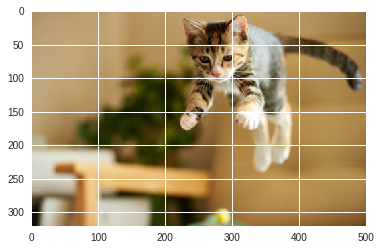

In [0]:
#show image
plt.imshow(image)

In [0]:
#saving the image
cv2.imwrite('test_write.jpg',image)

True

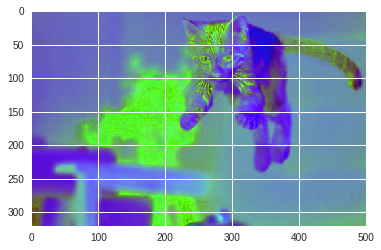

In [0]:
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

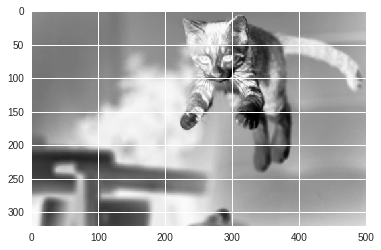

In [0]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

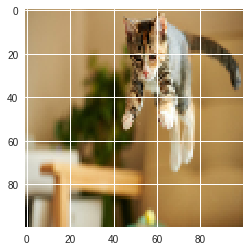

In [0]:
#resizing image
img_orignal = cv2.resize(image,(100,100))
plt.imshow(img_orignal)

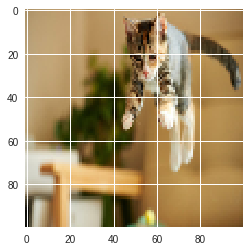

In [0]:
img_linear = cv2.resize(image,(100,100),interpolation=4)
plt.imshow(img_linear)

In [0]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('index.png') 
rows,cols = image.shape[:2]

In [0]:
print(rows,cols)

321 500


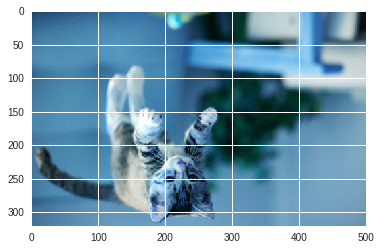

In [0]:
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst = cv2.warpAffine(image,M,(cols,rows))
plt.imshow(dst)

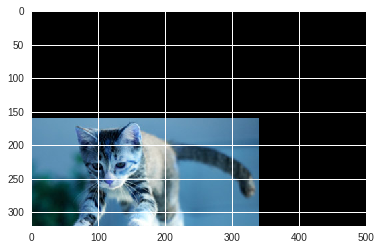

In [0]:
#shifting image 100 pixels in both direction
M =np.float32([[1,0,-60],[0,1,160]])
dst1 = cv2.warpAffine(image,M,(cols,rows))
plt.imshow(dst1)

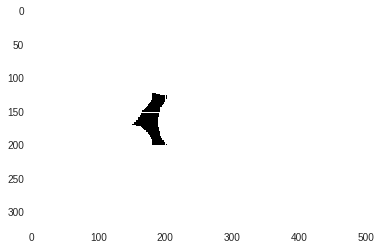

In [4]:
#reading the image
image = cv2.imread('index.png')
#converting image to grayscale format
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#apply thresholding
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#get a kernel
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)


In [1]:
#import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#show OpenCV version
print(cv2.__version__)
#read the iamge and convert to grayscale
image = cv2.imread('DSC_9026 copy.JPG')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#create sift object
sift  = cv2.xfeatures2d.SIFT_create()
#calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
#plot keypoints on the image
with_keypoints = cv2.drawKeypoints(gray,keypoints)
#plot the image
plt.imshow(with_keypoints)

3.4.3


error: ignored